# This is my final project for DAT350

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('student-mat.csv')
data.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [2]:
display(data.isna().sum())

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
def makeBarValueCount(aDF, colName, ax):
    aDF[colName].value_counts().plot(kind='bar', ax=ax)
    ax.set_xlabel(colName, labelpad=14)
    ax.set_ylabel("Count", labelpad=14)
    ax.set_title(f"The Count in the {colName} Column")


In [4]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [5]:
numerical = data.select_dtypes(include=['int', 'float']).columns
numerical

Index(['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2',
       'G3'],
      dtype='object')

In [6]:
categorical = data.select_dtypes(include=['object']).columns
categorical


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')

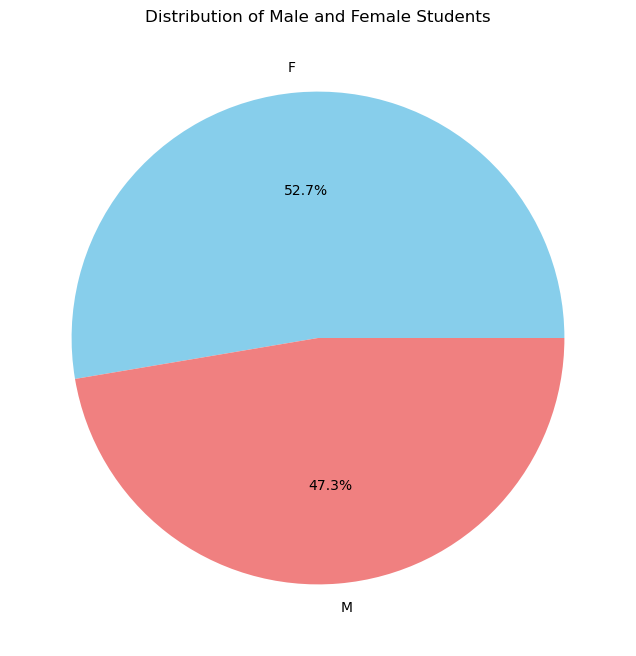

In [7]:
plt.figure(figsize=(8, 8))
data[categorical[1]].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Distribution of Male and Female Students')
plt.ylabel('')
plt.show()

IndexError: index 16 is out of bounds for axis 0 with size 16

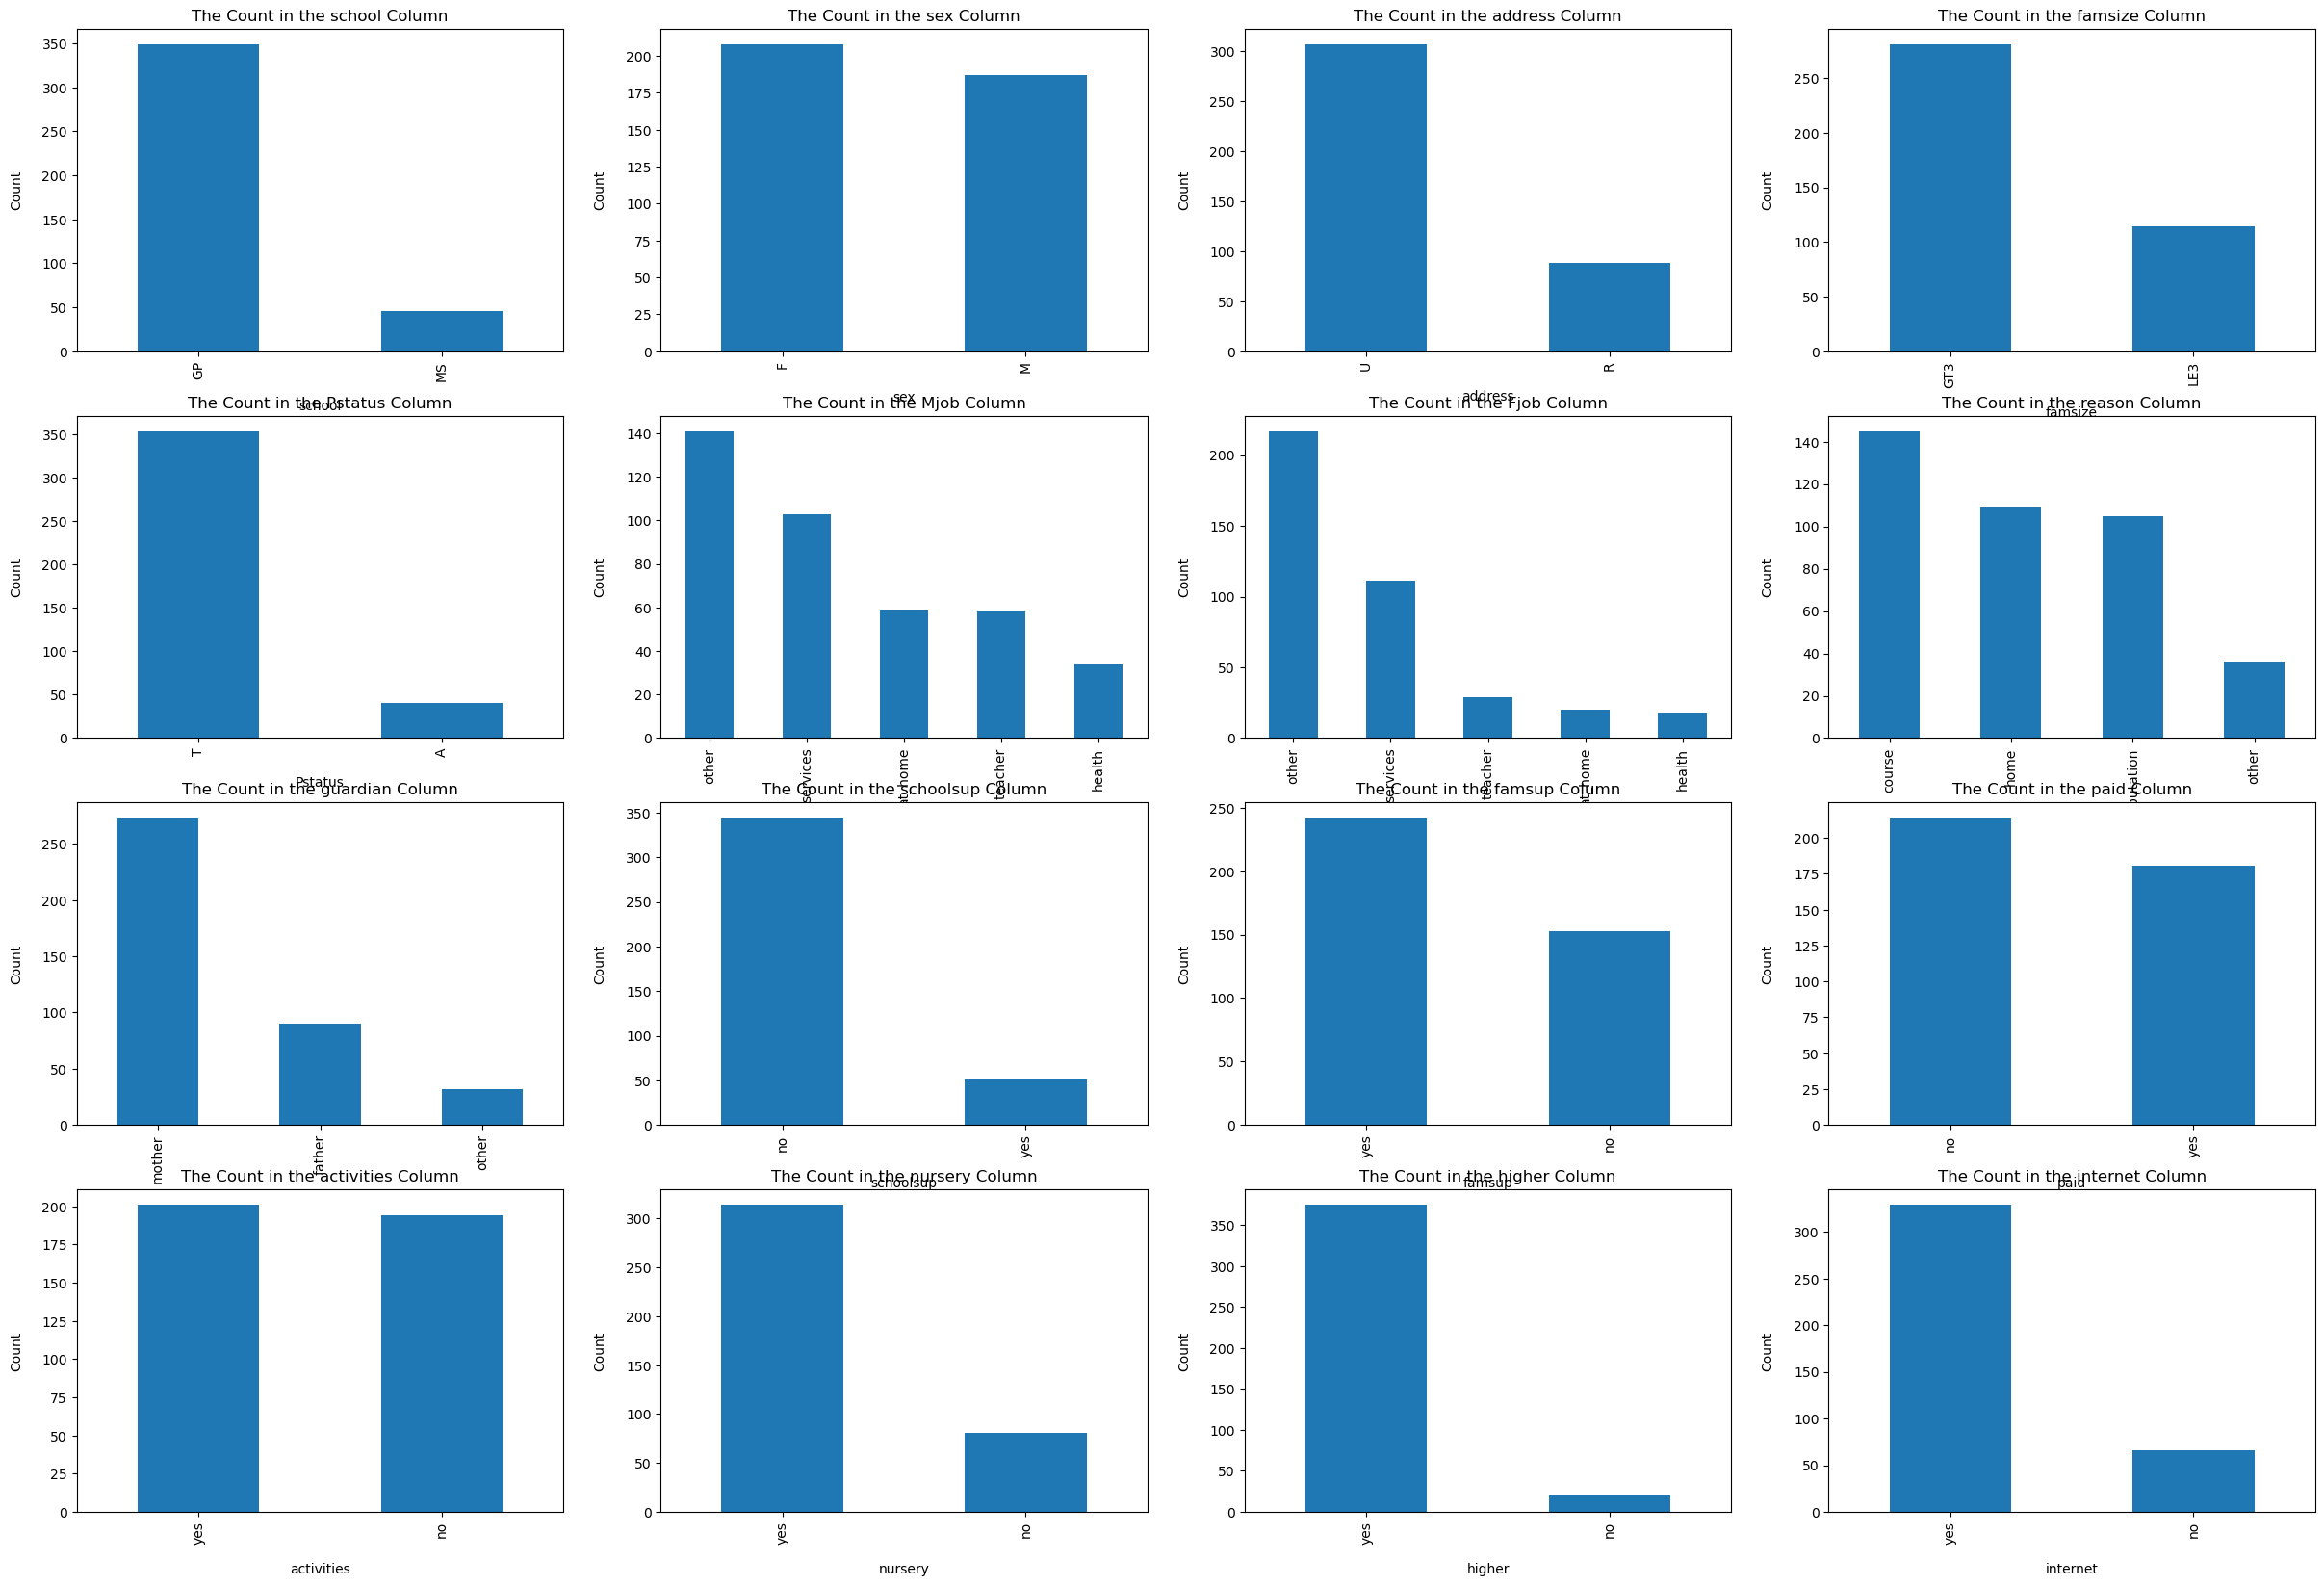

In [8]:
# Define dimensions of the subplot grid
num_plots = len(categorical)
num_cols = 4
num_rows = (num_plots + 1) // num_cols

# Create a figure and axis objects
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))

# Flatten the axs array if it's 2D
if num_rows > 1:
    axs = axs.flatten()

# Plot each categorical column as a bar graph
for i, col in enumerate(categorical):
    ax = axs[i]
    makeBarValueCount(data, col, ax)

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

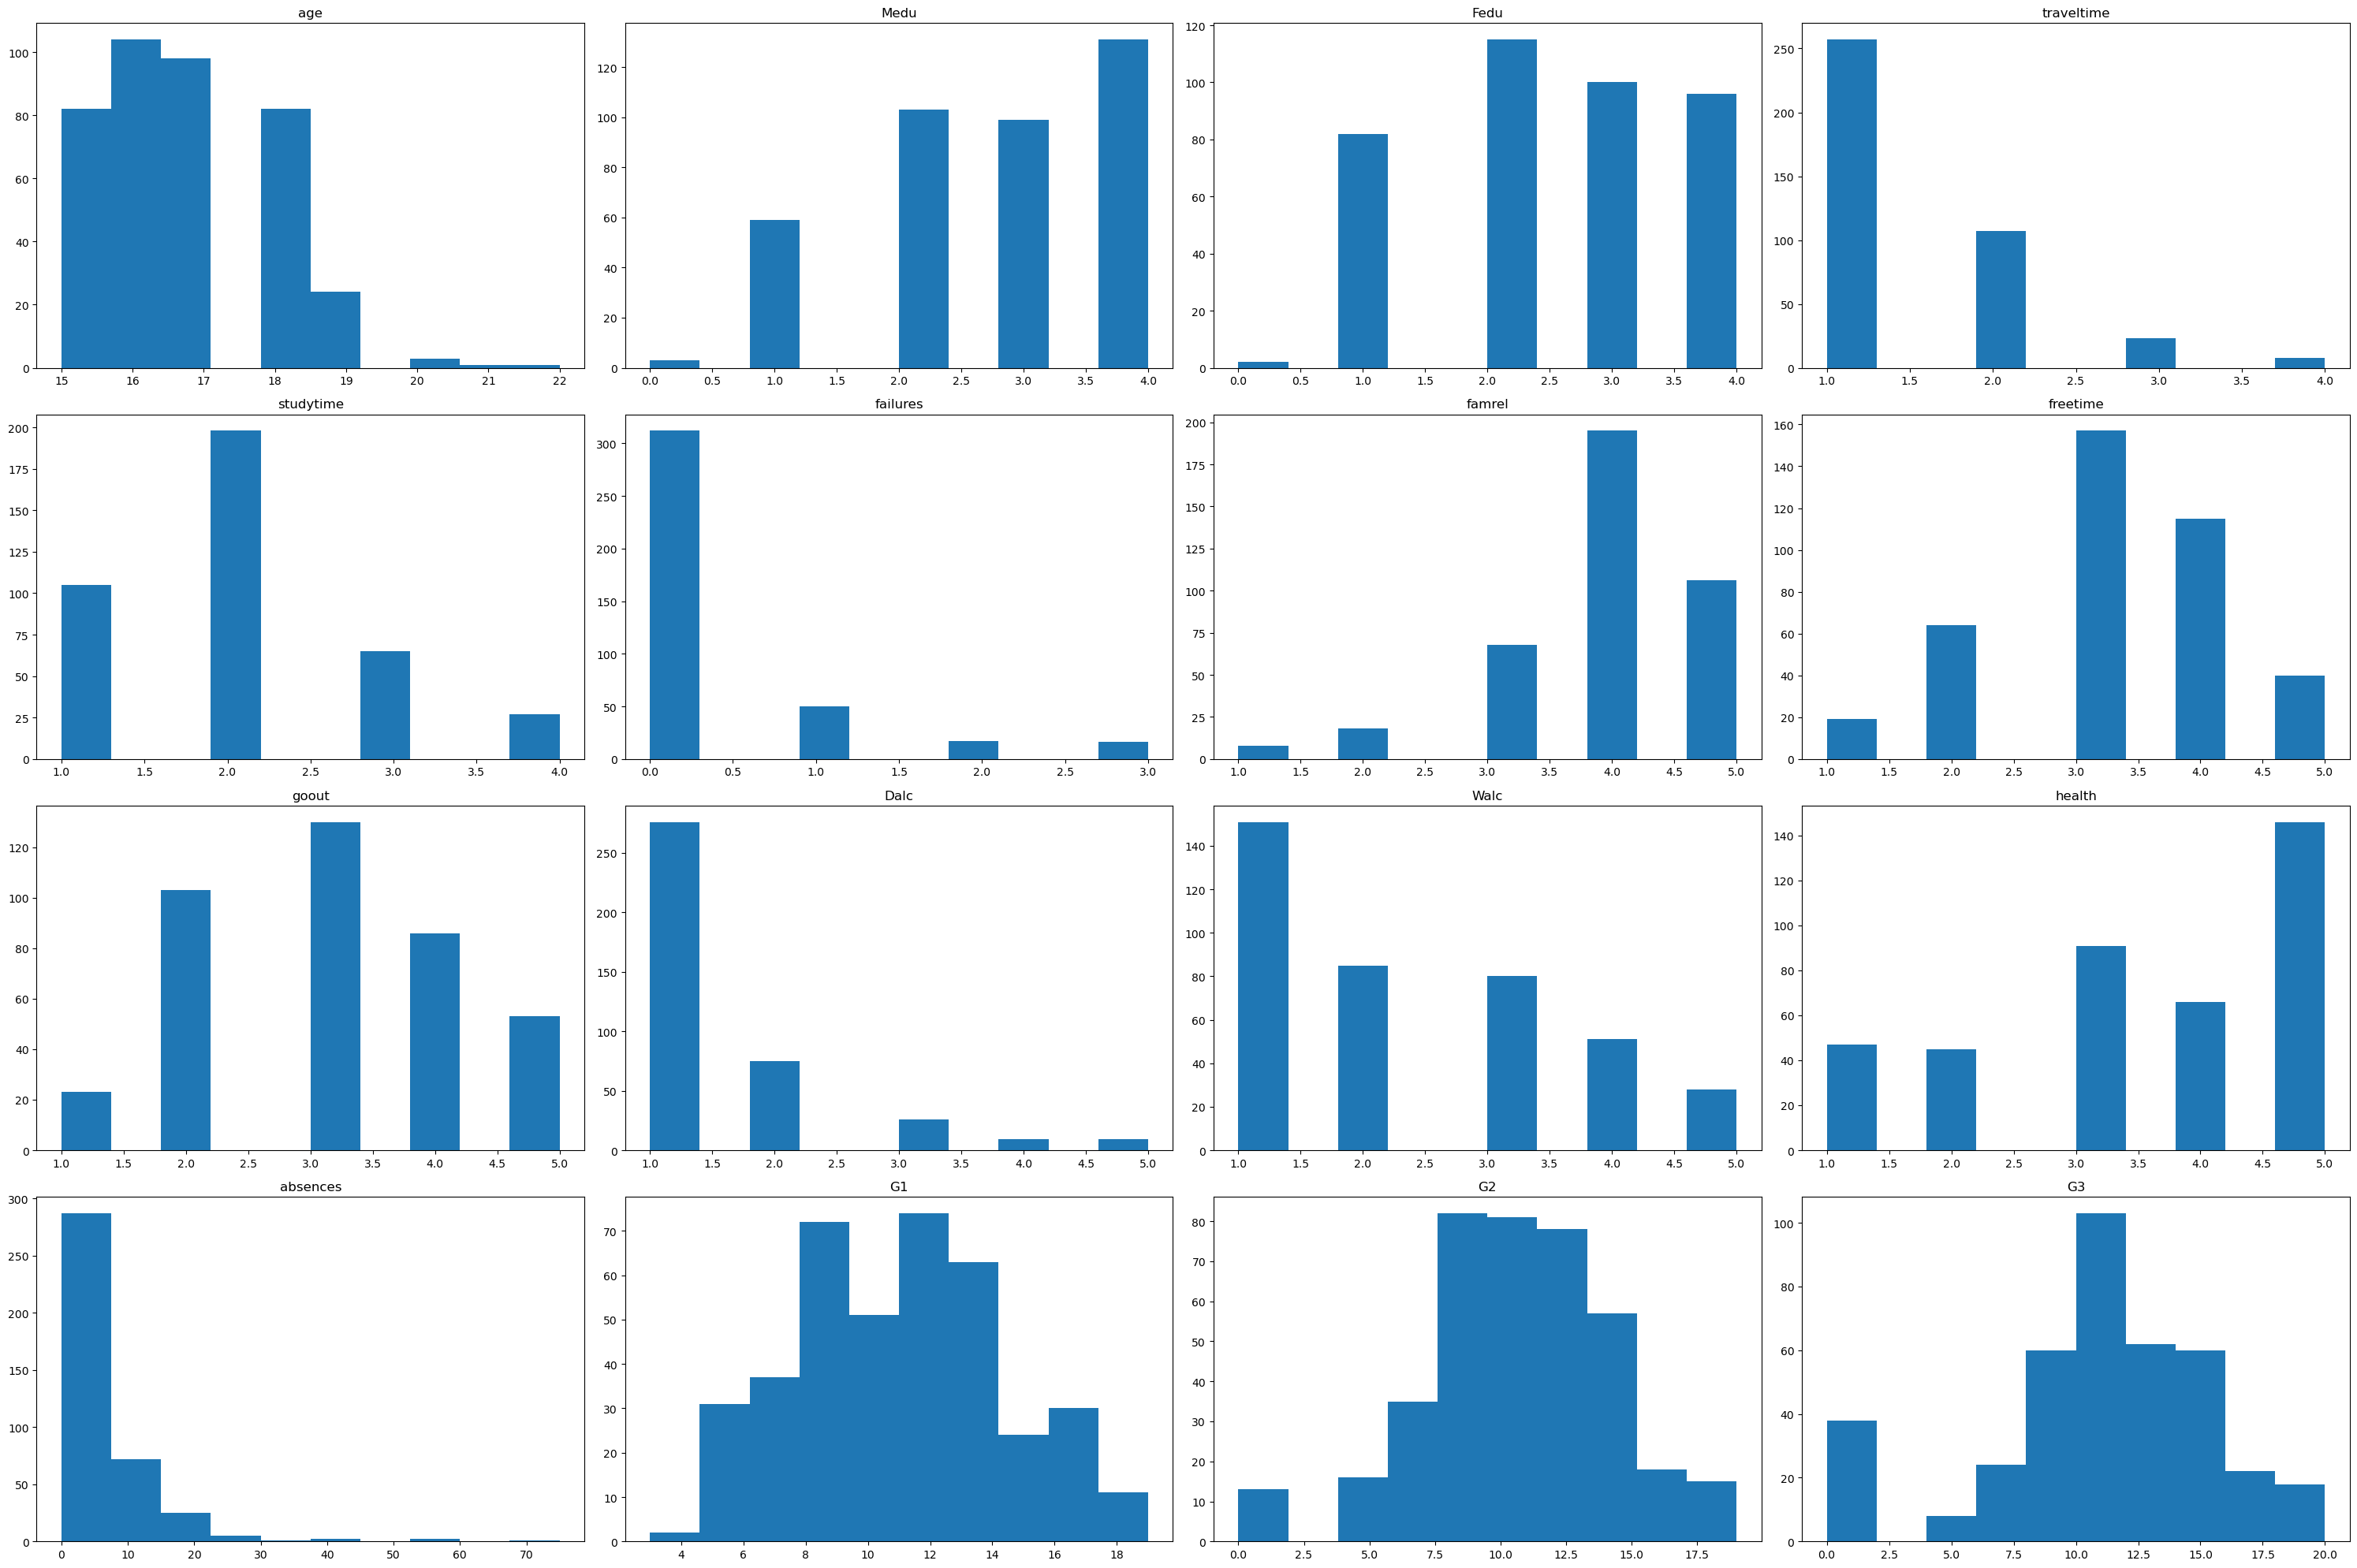

In [9]:
# Define dimensions of the subplot grid

# Define dimensions of the subplot grid
num_plots = len(numerical)
num_cols = 4
num_rows = (num_plots + 1) // num_cols

# Create a figure and axis objects
fig, axs = plt.subplots(num_rows, num_cols, figsize=(30, 20))

# Flatten the axs array if it's 2D
if num_rows > 1:
    axs = axs.flatten()

# Plot histograms for each numerical column
for i, col in enumerate(numerical):
    ax = axs[i]
    ax.hist(data[col], bins=10)  # Adjust the number of bins as needed

    # Set title for each subplot
    ax.set_title(col)

# Hide any unused subplots
for i in range(num_plots, num_rows * num_cols):
    axs[i].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import OneHotEncoder

def encoder(df, column):
    # Encode the specified column using OneHotEncoder
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(df[[column]].dropna())

    # Create a DataFrame from the encoded data
    one_hot_df = pd.DataFrame(encoded_data, columns=encoder.categories_)
    one_hot_df.columns = one_hot_df.columns.get_level_values(0)

    # Concatenate the original DataFrame with the one-hot encoded DataFrame
    clean_data = pd.concat([df, one_hot_df], axis=1).drop(columns=column)

    return clean_data

In [11]:

for col in categorical:
    data = encoder(data,col)

data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [12]:
data.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,1,2,0,5,3,3,1,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,1,2,3,4,3,2,2,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,0,3,2,2,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,1,2,0,4,3,2,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stdData = data
stdData[numerical] = scaler.fit_transform(data[numerical])

stdData.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,no,yes,no,yes,no,yes,no,yes,no,yes
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,0.062194,-0.236010,0.801479,-0.540699,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,1.178860,-0.236010,-0.097908,-0.540699,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,0.062194,-0.236010,-0.997295,0.583385,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.054472,-1.238419,-0.997295,-0.540699,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,0.062194,-0.236010,-0.997295,-0.540699,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [14]:
xDF = stdData.drop(columns=['G3'])
yDF = pd.DataFrame(stdData['G3'])

In [15]:
#Linear Regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


xTrain, xTest, yTrain, yTest = train_test_split(xDF, yDF, test_size=0.2, random_state=23)

model = LinearRegression()

model.fit(xTrain, yTrain)

preds = model.predict(xTest)

# Calculate mean squared error
print(r2_score(yTest, preds))
print(mean_squared_error(yTest,preds))

0.7522487487676596
0.28611180266443514


In [16]:
from sklearn.svm import SVR

# Create an SVR model
model = SVR(kernel='linear', C=1.0)

# Fit the model on the training data
model.fit(xTrain, yTrain)

# Make predictions on the testing data
preds = model.predict(xTest)

# Evaluate the model
mse = mean_squared_error(yTest, preds)
r2 = r2_score(yTest, preds)

print(r2_score(yTest, preds))
print(mean_squared_error(yTest,preds))

0.7359438752249152
0.30494124041026277


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()

# Train the model
model.fit(xTrain, yTrain)

# Predict on the test set
pred = model.predict(xTest)

print(r2_score(yTest, pred))

0.7900607040610752


In [18]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(100, ), activation='relu', solver='adam', random_state=42)

# Train the model
model.fit(xTrain, yTrain)

# Predict on the test set
pred = model.predict(xTest)

print(r2_score(yTest, pred))

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6946738851258494


In [19]:
from sklearn.linear_model import Lasso

#create lasso model
lasso_model= Lasso(alpha=0.1)

#fit the model with the training model
lasso_model.fit(xTrain, yTrain)

#make prediction
y_pred=lasso_model.predict(xTest)

print(mean_squared_error(yTest, y_pred))
print(r2_score(yTest, y_pred))

0.31321754473116237
0.7287772196308873


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the Random Forest Regressor
rf_regressor.fit(xTrain, yTrain)

# Predict the target values of the test set
y_pred = rf_regressor.predict(xTest)

# Calculate the Mean Squared Error (MSE) of the model
mse = mean_squared_error(yTest, y_pred)
print( mse)

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.21329201200386694


In [21]:
from sklearn.preprocessing import StandardScaler

xScaler = StandardScaler()
xColNames = xTrain.columns.values.tolist()
# train the scaler and apply it to the training set
xTrainScaled = xScaler.fit_transform(xTrain[xColNames])

In [24]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'fit_intercept': [True, False],  # Example values, replace with your choices
    'positive': [True, False]       # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your Linear Regression model
model = LinearRegression()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best Linear Regression model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Parameters: {'fit_intercept': False, 'positive': True}
Test Score: 0.7450646087208281


In [25]:
from sklearn.svm import SVR  # SVR for Support Vector Regression

parameters = {
    'kernel': ['linear', 'rbf'],  # Example values, replace with your choices
    'C': [0.1, 1, 10],             # Example values, replace with your choices
    'gamma': ['scale', 'auto']     # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your SVR model
model = SVR()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best SVR model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Test Score: 0.7359438752249152


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [27]:
parameters = {
    'alpha': [0.1, 1, 10],           # Example values, replace with your choices
    'fit_intercept': [True, False],  # Example values, replace with your choices
    'positive': [True, False],       # Example values, replace with your choices
    'selection': ['cyclic', 'random']      # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your Lasso Regression model
model = Lasso()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best Lasso Regression model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'alpha': 0.1, 'fit_intercept': False, 'positive': True, 'selection': 'random'}
Test Score: 0.7287299134055766


In [28]:
from sklearn.ensemble import RandomForestRegressor  

parameters = {
    'n_estimators': [100, 200, 300],  # Example values, replace with your choices
    'max_depth': [None, 10, 20],        # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your model
model = RandomForestRegressor()  # Replace with your model

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best Parameters: {'max_depth': None, 'n_estimators': 300}
Test Score: 0.8055107296121535


In [29]:
parameters = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],  # Example values, replace with your choices
    'activation': ['relu', 'tanh', 'logistic'],        # Example values, replace with your choices
    'alpha': [0.0001, 0.001, 0.01],                    # Example values, replace with your choices
    'learning_rate': ['constant', 'adaptive']          # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your MLP Regressor model
model = MLPRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best MLP Regressor model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Parameters: {'activation': 'tanh', 'alpha': 0.01, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive'}
Test Score: 0.74672327765315


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
parameters = {
    'max_depth': [None, 5, 10, 20],      # Example values, replace with your choices
    'min_samples_split': [2, 5, 10],     # Example values, replace with your choices
    'min_samples_leaf': [1, 2, 4]        # Example values, replace with your choices
    # Add more hyperparameters and their values here
}

# Initialize your Decision Tree Regressor model
model = DecisionTreeRegressor()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=parameters, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(xTrain, yTrain)

# Print the best parameters found
print("Best Parameters:", grid_search.best_params_)

# Get the best Decision Tree Regressor model
best_model = grid_search.best_estimator_

# Evaluate the best model on test data
test_score = best_model.score(xTest, yTest)
print("Test Score:", test_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test Score: 0.7806594558399116


In [31]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Initialize your Linear Regression model
model = LinearRegression()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", sum(cv_scores) / len(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))

Cross-Validation Scores: [0.8604369971148771, 0.7276153011559836, 0.8476129793835088, 0.8158500845121999, 0.7615562259363451]
Mean CV Score: 0.8026143176205828
Standard Deviation of CV Scores: 0.050703346463466914


In [32]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Initialize your Linear Regression model
model = LinearRegression()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", sum(cv_scores) / len(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Cross-Validation Scores: [0.8604369971148771, 0.7276153011559836, 0.8476129793835088, 0.8158500845121999, 0.7615562259363451]
Mean CV Score: 0.8026143176205828
Standard Deviation of CV Scores: 0.050703346463466914


In [33]:
from sklearn.model_selection import KFold
from sklearn.svm import SVR
import numpy as np

# Initialize your SVR model
model = SVR()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Support Vector Regressor - Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Support Vector Regressor - Cross-Validation Scores: [0.7643115698475856, 0.6893194034835872, 0.7595871355218412, 0.7963548967507664, 0.7647653148982592]
Mean CV Score: 0.754867664100408
Standard Deviation of CV Scores: 0.03529076139856188


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [34]:
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
import numpy as np

# Initialize your Lasso Regression model
model = Lasso()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Lasso Regression - Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Lasso Regression - Cross-Validation Scores: [-0.007067013635742914, -0.07840333105230513, -0.013131967270851641, -0.008958767289387826, -5.673337593958827e-05]
Mean CV Score: -0.02152356252484542
Standard Deviation of CV Scores: 0.02875210454017079


In [35]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Initialize your Random Forest Regressor model
model = RandomForestRegressor()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Random Forest Regressor - Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

Random Forest Regressor - Cross-Validation Scores: [0.8297484345131377, 0.8654973149077962, 0.9430344404026948, 0.9028960025021596, 0.7649466781696646]
Mean CV Score: 0.8612245740990906
Standard Deviation of CV Scores: 0.061168290954735464


In [36]:
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPRegressor
import numpy as np

# Initialize your MLP Regressor model
model = MLPRegressor()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("MLP Regressor - Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\SA\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1625: DataConversionWarning: A column-vector y was passed w

MLP Regressor - Cross-Validation Scores: [0.7641857644241271, 0.6544574882981429, 0.7841325746502782, 0.7353472769066269, 0.6649211204180188]
Mean CV Score: 0.7206088449394388
Standard Deviation of CV Scores: 0.052208348322580964


In [37]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Initialize your Decision Tree Regressor model
model = DecisionTreeRegressor()

# Initialize KFold with desired number of splits (e.g., 5)
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation with shuffling

# List to store cross-validation scores
cv_scores = []

# Perform cross-validation
for train_index, test_index in kf.split(xTrain):
    # Split data into training and validation sets
    x_train_fold, x_val_fold = xTrain.iloc[train_index], xTrain.iloc[test_index]
    y_train_fold, y_val_fold = yTrain.iloc[train_index], yTrain.iloc[test_index]
    
    # Fit the model on the training data
    model.fit(x_train_fold, y_train_fold)
    
    # Evaluate the model on the validation data
    score = model.score(x_val_fold, y_val_fold)
    
    # Store the score
    cv_scores.append(score)

# Print the cross-validation scores
print("Decision Tree Regressor - Cross-Validation Scores:", cv_scores)

# Calculate and print the mean and standard deviation of the cross-validation scores
print("Mean CV Score:", np.mean(cv_scores))
print("Standard Deviation of CV Scores:", np.std(cv_scores))


Decision Tree Regressor - Cross-Validation Scores: [0.6610902010139746, 0.7074014058791309, 0.8878371801111766, 0.7119388758154359, 0.7902967230041845]
Mean CV Score: 0.7517128771647805
Standard Deviation of CV Scores: 0.07972011805808064


In [38]:
#best model RFR 

from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor with the best hyperparameters
best_rf_model = RandomForestRegressor(max_depth=None, n_estimators=300)

# Retrain the model on the entire training data (xDF, yDF)
best_rf_model.fit(xDF, yDF)

# Evaluate the model on the separate testing set (xTest, yTest)
test_score_rf = best_rf_model.score(xTest, yTest)

print("Random Forest Test Score:", test_score_rf)

c:\Users\SA\anaconda3\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Test Score: 0.9799095539680018


In [39]:
#second best model
from sklearn.linear_model import LinearRegression

# Initialize the LinearRegression with the best hyperparameters
best_lr_model = LinearRegression(fit_intercept=False, positive=True)

# Retrain the model on the entire training data (xDF, yDF)
best_lr_model.fit(xDF, yDF)

# Evaluate the model on the separate testing set (xTest, yTest)
test_score_lr = best_lr_model.score(xTest, yTest)

print("Linear Regression Test Score:", test_score_lr)

Linear Regression Test Score: 0.7728655028921767
